**Diabetes prediction model with Balanced Data**

This model was built with balanced dataset provided by  https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.




**Import Libraries**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
#from imblearn.over_sampling import SMOTE
import os

**Data Download**

In [ ]:
!wget 'https://docs.google.com/uc?export=download&id=18y_hPhj7dOZccJGEiR9iuHAUDpICi9fo' -O health_data_balanced.csv

--2024-12-17 11:53:17--  https://docs.google.com/uc?export=download&id=18y_hPhj7dOZccJGEiR9iuHAUDpICi9fo
Resolving docs.google.com (docs.google.com)... 172.217.204.100, 172.217.204.139, 172.217.204.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=18y_hPhj7dOZccJGEiR9iuHAUDpICi9fo&export=download [following]
--2024-12-17 11:53:17--  https://drive.usercontent.google.com/download?id=18y_hPhj7dOZccJGEiR9iuHAUDpICi9fo&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6347570 (6.1M) [application/octet-stream]
Saving to: ‘health_data_balanced.csv’

health_data_balance 100%[===================>]   6.05

**load data into pandas dataframe**

In [ ]:
health_data = pd.read_csv('health_data_balanced.csv')

**Get first few rows of the datatset**

In [ ]:
health_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


**Get column names, datatypes and total count of non-null from a dataset**

In [ ]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

**Check for missing values of each column if the null values are present then the rows with NaN will be replaced with Median through impute**

In [ ]:
health_data.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


Check outliers for the selected features  and detect if the outlier is greater than or less than 3 to replace outliers with median. In this case outliers will be detected on the columns

```
'BMI', 'MentHlth', 'PhysActivity', 'Age', 'Income'
```



In [ ]:
# Step 1: Copy the dataset
health_data_copy = health_data.copy()

# Step 2: Define columns for outlier detection
columns_to_check = ['BMI', 'MentHlth', 'PhysActivity', 'Age', 'Income']

# Step 3: Calculate Z-scores and replace outliers dynamically
for col in columns_to_check:
    # Calculate Z-scores for the column
    z_scores = zscore(health_data_copy[col])

    # Detect outliers (Z-score > 3 or < -3)
    outlier_indices = health_data_copy.index[np.abs(z_scores) > 3]

    # Replace outliers with the median
    health_data_copy.loc[outlier_indices, col] = health_data_copy[col].median()

In [ ]:
health_data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.495516,6.187655,12.0,25.0,29.0,33.0,51.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


This summary provides statistical insights for each column of a health dataset, detailing the count, mean, standard deviation (std), and specific percentiles (min, 25%, 50%, 75%, max).


*   High Blood Pressure: Mean 0.56 around 56 percent individuals from the dataset reported high bp
*   



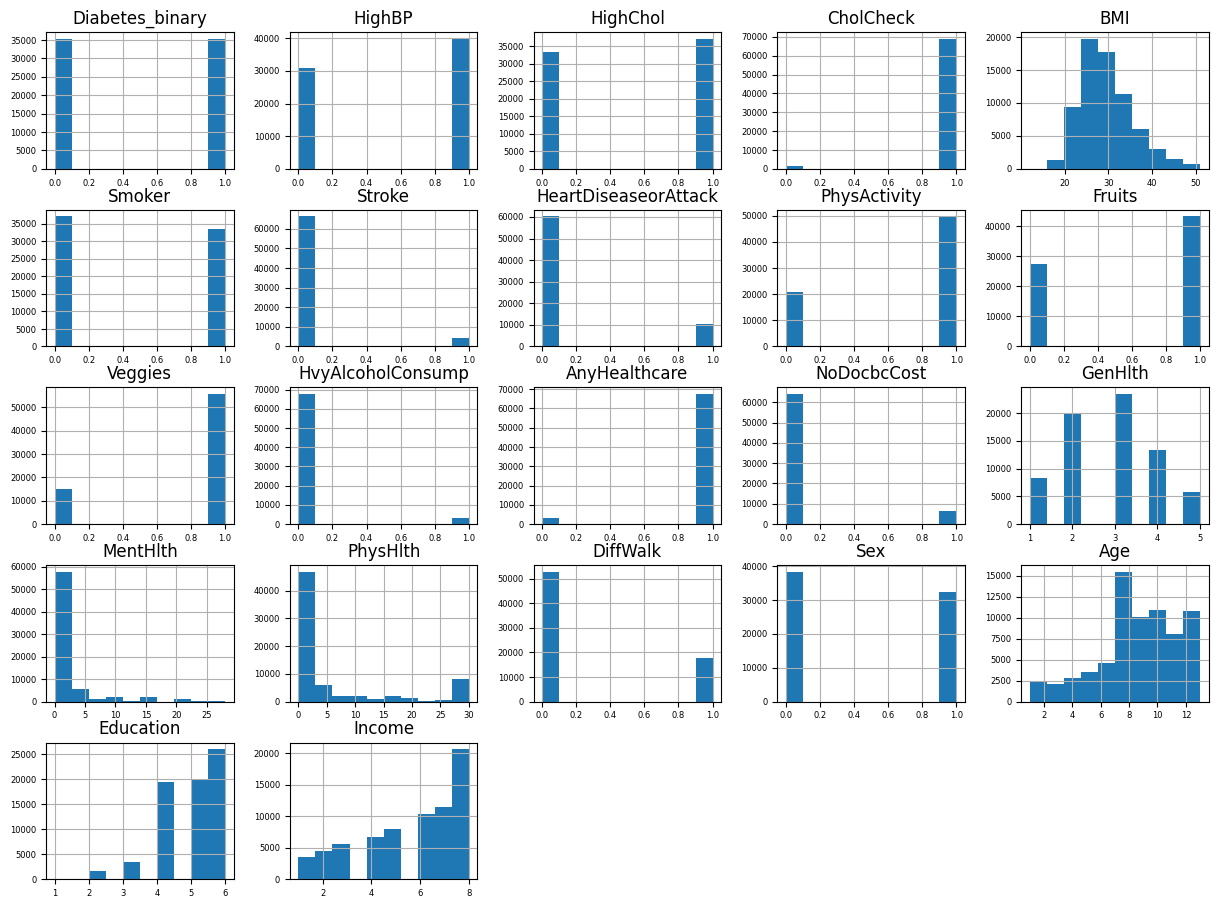

In [ ]:
#histograms to inspect data
plt.rc('font', size=12)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)

health_data_copy.hist(bins=10, figsize=(15, 11))
plt.show()

In [ ]:
def plot_multiple_boxplots(df, columns=None):

    if columns is None:
        columns = df.select_dtypes(include='number').columns.tolist()

    df_melted = df[columns].melt(var_name='Feature', value_name='Value')

    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Feature', y='Value', data=df_melted)
    plt.title('Boxplots of Health Data')
    plt.xticks(rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.show()

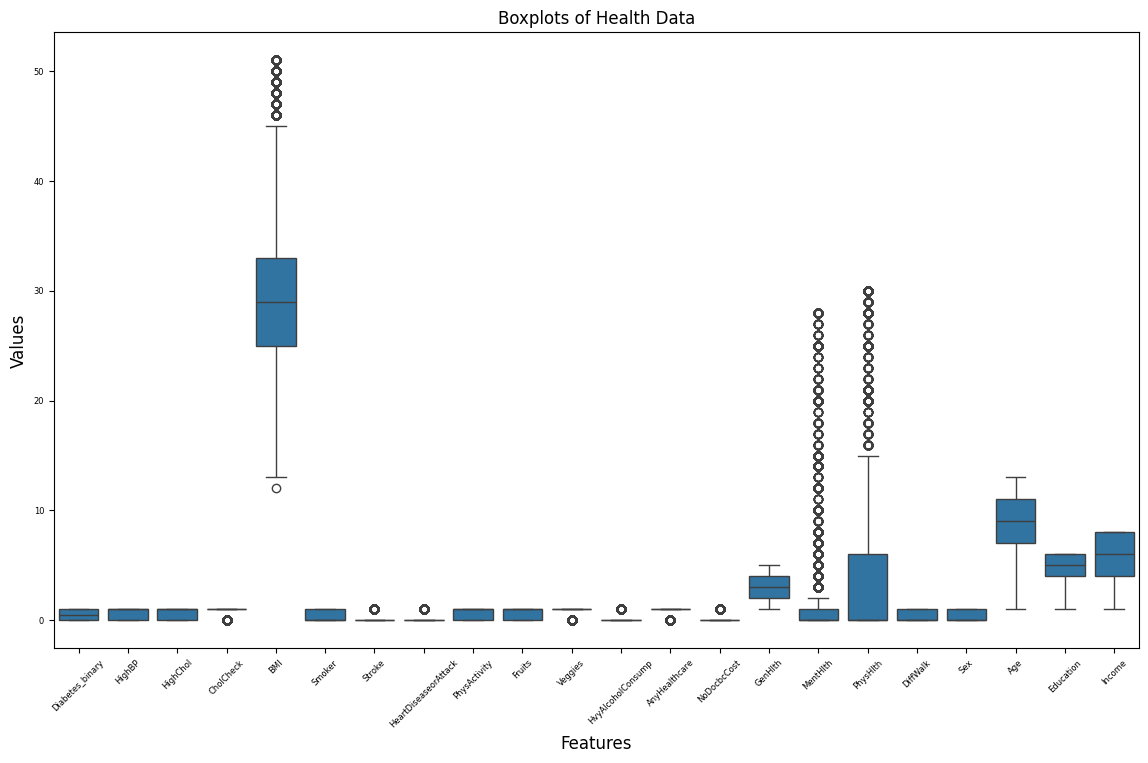

In [ ]:
#plot all features to identify outliers
plot_multiple_boxplots(health_data_copy)

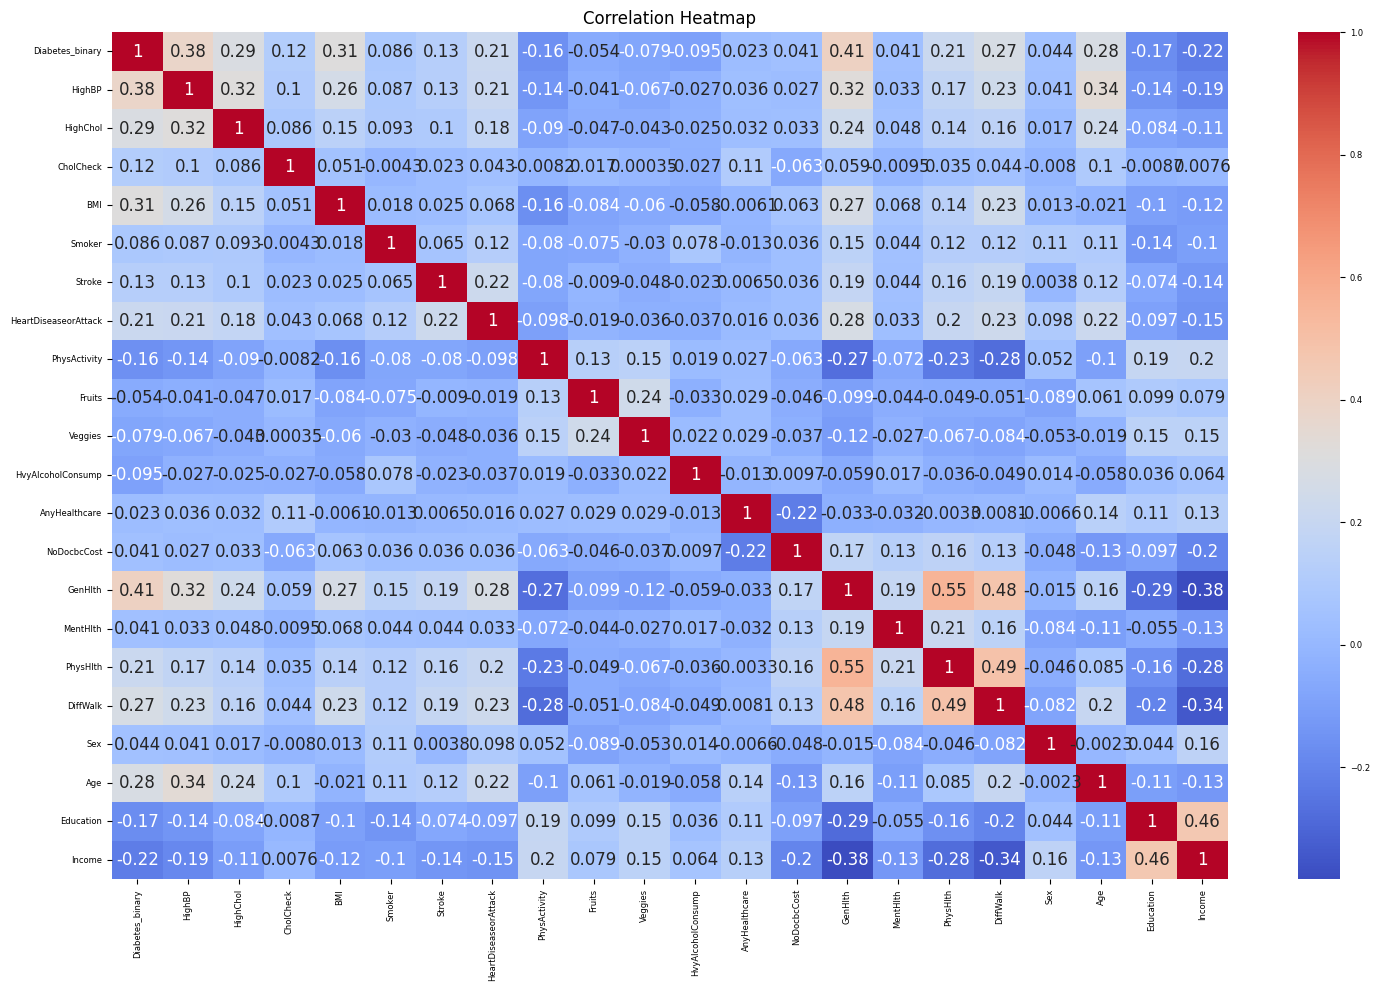

In [ ]:
#correlation heat map
plt.figure(figsize=(18, 11))
sns.heatmap(health_data_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
health_data_copy['HealthyDiet'] = health_data_copy['Fruits'] + health_data_copy['Veggies']

# Physical Health Index
health_data_copy['PhysicalHealthIndex'] = health_data_copy['PhysHlth'] - health_data_copy['MentHlth']

# BMI and Age interaction
health_data_copy['BMI_Age'] = health_data_copy['BMI'] * health_data_copy['Age']

# Aggregate high-risk features into a single score
health_data_copy['RiskFactorScore'] = (
    health_data_copy['HighBP'] +
    health_data_copy['HighChol'] +
    health_data_copy['HeartDiseaseorAttack'] +
    health_data_copy['Stroke']
)

# Select numerical features to scale
numerical_features = ['BMI', 'Age', 'MentHlth', 'PhysHlth', 'HealthyDiet', 'PhysicalHealthIndex', 'RiskFactorScore']
scaler = StandardScaler()
health_data_copy[numerical_features] = scaler.fit_transform(health_data_copy[numerical_features])

# Step 5: Drop Low-Importance Features
low_importance_features = ['CholCheck', 'AnyHealthcare', 'HvyAlcoholConsump']
health_data_copy.drop(columns=low_importance_features, inplace=True)

# Step 6: Validate Changes
print(health_data_copy.info())
print(health_data_copy.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   BMI                   70692 non-null  float64
 4   Smoker                70692 non-null  float64
 5   Stroke                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  NoDocbcCost           70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Sex                

In [ ]:
# Split data into features and target
X = health_data_copy.drop('Diabetes_binary', axis=1)
y = health_data_copy['Diabetes_binary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y.value_counts()

,count
Diabetes_binary,
0.0,35346
1.0,35346


In [ ]:
# Parameter distributions for RandomizedSearchCV
param_distributions_dt = {
    'max_depth': [None, 3, 10, 20],
    'min_samples_split': [2, 4, 20],
    'criterion': ['gini', 'entropy', 'log_loss']
}

param_distributions_rf = {
    'n_estimators': [50, 100],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples at leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider
    'bootstrap': [True, False],  # Bootstrap sampling
    'class_weight': ['balanced', 'balanced_subsample']  # Handle imbalance
}

# Apply RandomizedSearchCV for Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
random_search_dt = RandomizedSearchCV(
    estimator=dt_clf,
    param_distributions=param_distributions_dt,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    random_state=42
)
random_search_dt.fit(X_train, y_train)

# Best Decision Tree model
best_dt = random_search_dt.best_estimator_
dt_predictions = best_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

# Apply RandomizedSearchCV for Random Forest
rf_clf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_distributions_rf,
    n_iter=10,
    scoring='f1_macro',
    cv=3,
    random_state=42
)
random_search_rf.fit(X_train, y_train)

# Best Random Forest model
best_rf = random_search_rf.best_estimator_
rf_predictions = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

# Compare Results
results_comparison = pd.DataFrame({
    'Model': ['Decision Tree (Best)', 'Random Forest (Best)'],
    'Accuracy': [dt_accuracy, rf_accuracy],
    'F1 Score': [dt_f1, rf_f1]
})

# Print Best Parameters and Comparison
print("\nBest Parameters for Decision Tree:")
print(random_search_dt.best_params_)
print("\nBest Parameters for Random Forest:")
print(random_search_rf.best_params_)
print("\nModel Performance Comparison:")
print(results_comparison)


Best Parameters for Decision Tree:
{'min_samples_split': 4, 'max_depth': 10, 'criterion': 'log_loss'}

Best Parameters for Random Forest:
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'class_weight': 'balanced_subsample', 'bootstrap': True}

Model Performance Comparison:
                  Model  Accuracy  F1 Score
0  Decision Tree (Best)  0.729542  0.729286
1  Random Forest (Best)  0.747861  0.747241


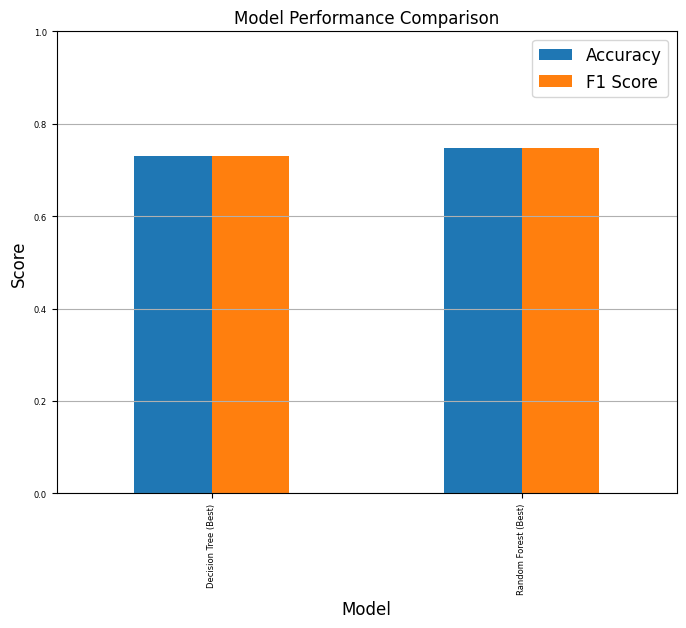

In [ ]:
# Visualize Comparison
results_comparison.set_index('Model').plot(kind='bar', figsize=(8, 6), ylim=(0, 1))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.grid(axis='y')
plt.show()

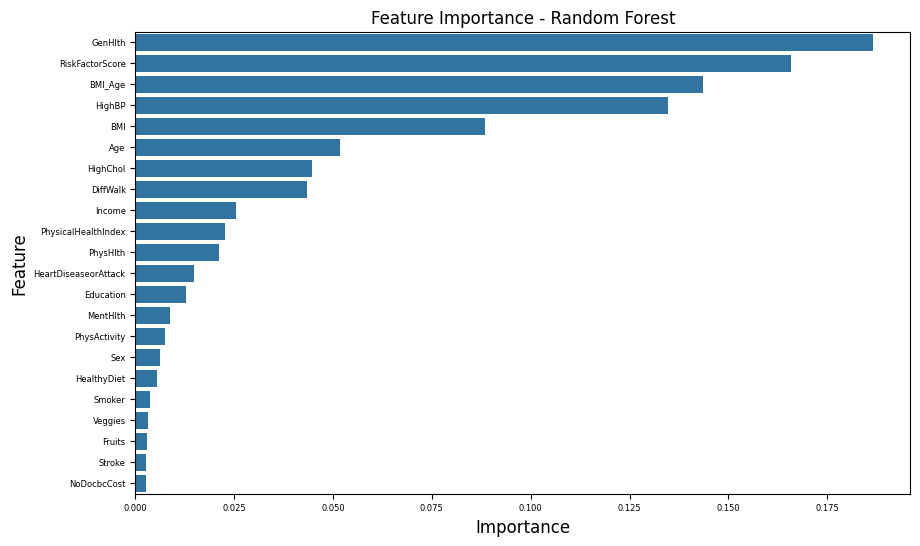

In [ ]:
#Feature importance

feature_importance = best_rf.feature_importances_
importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_rf = importance_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_rf)
plt.title("Feature Importance - Random Forest")
plt.show()

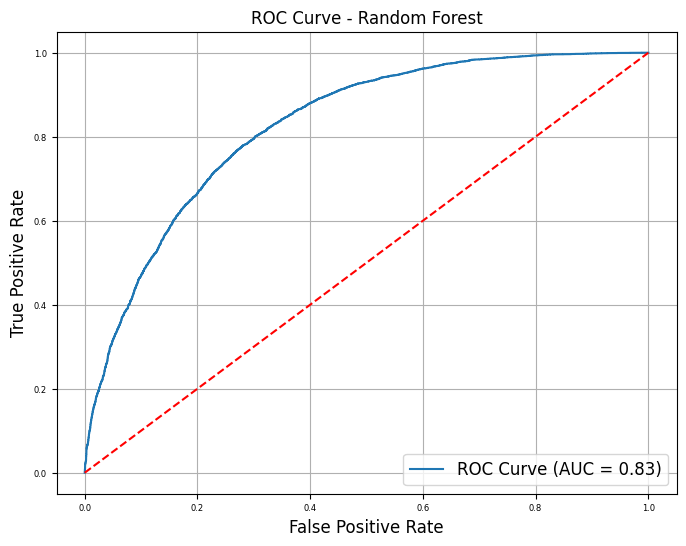

In [ ]:
#ROC curve
best_rf_clf = RandomForestClassifier(
    max_depth=random_search_rf.best_params_['max_depth'],
    min_samples_split=random_search_rf.best_params_['min_samples_split'],
    # Assuming 'criterion' was a parameter in your Random Forest search
    criterion=random_search_rf.best_params_.get('criterion', 'gini'),  # Default to 'gini' if not found
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
best_rf_clf.fit(X_train, y_train)
rf_proba = best_rf_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

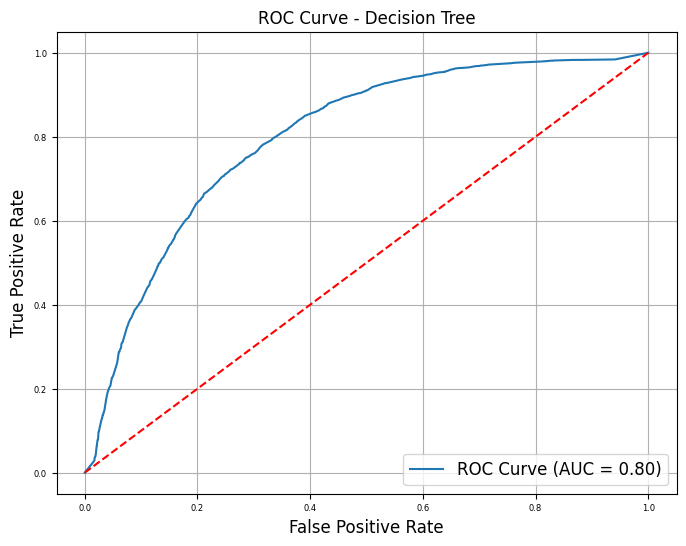

In [ ]:
#ROC curve for Decision tree
best_dt_clf = DecisionTreeClassifier(
    max_depth=random_search_dt.best_params_['max_depth'],
    min_samples_split=random_search_dt.best_params_['min_samples_split'],
    criterion=random_search_dt.best_params_.get('criterion', 'gini'),
    random_state=42
)
# Removed 'n_estimators' and 'class_weight' parameters
# as they are not applicable to DecisionTreeClassifier
best_dt_clf.fit(X_train, y_train)
rf_proba = best_dt_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

**ROC curve with the value 0.80**

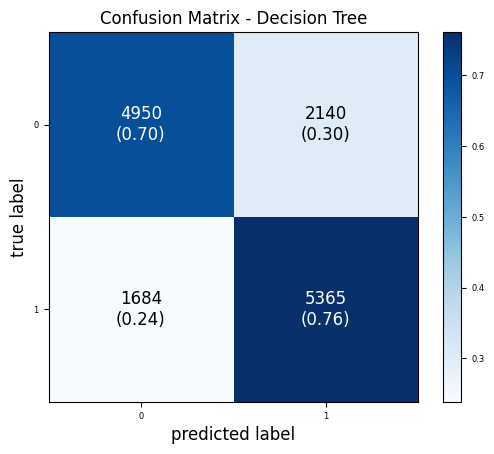

In [ ]:
# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_predictions)
#disp_dt = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=np.unique(y_test))
#disp_dt.plot(cmap='Blues')
plot_confusion_matrix(conf_mat=dt_cm,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

* The false positive rate is at approximately  30.2 percent. Which means 30.2 percent of class 0 samples were incorrectly classified as class1.
* Precision for class 0 is 75 percent and for class 1 is 71 percent.
* Recall of class 1 is  0.76 meaning 76 percent of actual class 1 samples are captured.
* Overall accuracy score is 71 percent


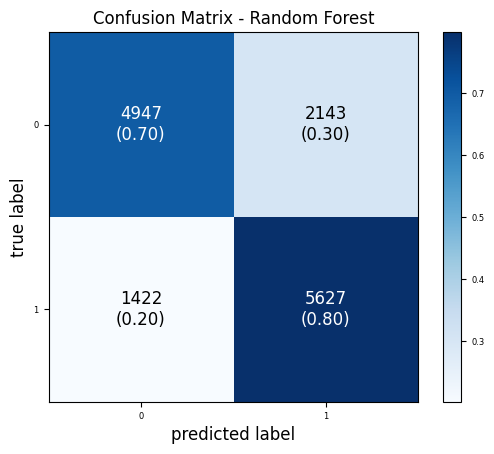

In [ ]:
# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
#disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=np.unique(y_test))
#disp_rf.plot(cmap='Blues', values_format='d')
plot_confusion_matrix(conf_mat=rf_cm,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title('Confusion Matrix - Random Forest')
plt.show()

* The False positive rate is at approximately 30 percent. Which means 30 percent of class 0 samples were incorrectly classified as class 1.
* Precision for class 0 is 78 percent and for class 1 is 72 percent
* Recall of class 1 is 0.80 meaning 80 percent of actual class 1 samples are captured
* Overall accuracy score is 75 percent


In [ ]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7090
         1.0       0.72      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [ ]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72      7090
         1.0       0.71      0.76      0.74      7049

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139

